In [1]:
% matplotlib inline
from pylab import *
from sympy import symbols, lambdify, Symbol, diff
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# t0 t1 is what we want to find, x is a sample we test again the h function
t0, t1, x = symbols("t0 t1 x")
h_expr = t0 + t1 * x


In [3]:
# our result, we will find the value we define here by GD.
theta0_correct_value = 9.86541217538
theta1__correct_value = -15.23689
# generate our training set
X = linspace(-5, 5, 100)
# map function
h = lambdify((t0, t1, x), h_expr, "numpy")
# map X to Y
Y = h(theta0_correct_value, theta1__correct_value, X)


In [4]:
y = Symbol("y")
q_expr = ((h_expr - y) ** 2) / 2
diff(q_expr, t0)


t0 + t1*x - y

In [5]:
q = lambdify((t0, t1, x, y), q_expr, "numpy")
def cost_func(theta0, theta1):
    return sum(q(theta0, theta1, X, Y)) / X.size
# the error is zero for correct value of theta
cost_func(theta0_correct_value, theta1__correct_value)


1.467281283711082e-30

In [6]:
partial_theta0_expr = diff(q_expr, t0)
partial_theta0 = lambdify((t0, t1, x, y), partial_theta0_expr, "numpy")
partial_theta1_expr = diff(q_expr, t1)
partial_theta1 = lambdify((t0, t1, x, y), partial_theta1_expr, "numpy")

def gradient_descent(theta0, theta1, alpha = 0.01):
    new_theta0 = theta0 - alpha * (sum(partial_theta0(theta0, theta1, X, Y)) / X.size)
    new_theta1 = theta1 - alpha * (sum(partial_theta1(theta0, theta1, X, Y)) / X.size)
    return new_theta0, new_theta1


In [7]:
theta0_start = -25.452
current_theta0 = theta0_start
theta1_start = 27.856
current_theta1 = theta1_start
total_iteration = 500
theta_histtory = []
for i in range(total_iteration):
    cost = cost_func(current_theta0, current_theta1)
    theta_histtory.append([current_theta0, current_theta1, cost])
    #print(i, "time", "update theta to", "current_theta0:", current_theta0, "current_theta1", current_theta1, "cost is", cost)
    current_theta0, current_theta1 = gradient_descent(current_theta0, current_theta1)


In [8]:
theta_line = array(theta_histtory)
theta0_x_pos, theta1_y_pos, theta_cost_z_pos = hsplit(theta_line, 3)
theta0_x_pos = reshape(theta0_x_pos, total_iteration)
theta1_y_pos = reshape(theta1_y_pos, total_iteration)
theta_cost_z_pos = reshape(theta_cost_z_pos, total_iteration)


In [9]:
T0 = T1 = arange(theta0_start * 1.5, theta1_start * 2, 1)
T0, T1 = meshgrid(T0, T1)
zs = array([cost_func(x, y) for x, y in zip(np.ravel(T0), np.ravel(T1))])
Z = zs.reshape(T0.shape)


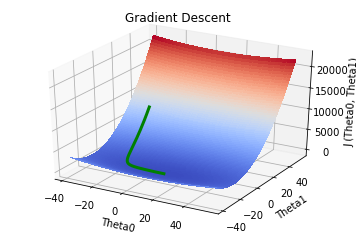

In [11]:
fig = figure()
#ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

#the start point
ax.scatter([theta0_start], [theta1_start], [cost_func(theta0_start, theta1_start)], c="black", linewidths=9)

# theta update history
ax.plot(theta0_x_pos, theta1_y_pos, theta_cost_z_pos, c="green", linewidth=3)
# cset = ax.contourf(T0, T1, Z, zdir='z', cmap=cm.coolwarm)
# cset = ax.contourf(T0, T1, Z, zdir='x', cmap=cm.coolwarm)
# cset = ax.contourf(T0, T1, Z, zdir='y', cmap=cm.coolwarm)
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('J (Theta0, Theta1)')
plt.title('Gradient Descent')

show()

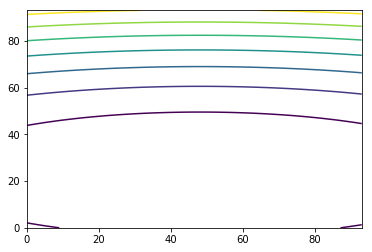

In [12]:
plt.contour(Z)